In [1]:
import numpy as np
from vpsto.obf import OBF
from vpsto.vptraj import VPTraj

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
q0 = np.array([0, 0])
qf = np.array([1, 1])
dq0 = np.array([0, 0])
dqf = np.array([0, 0])
R = 2e-1

via_prior = np.array([0.1, 0.9])

N_traj = 1000

# Create a grid of Q values and P_prior values
Qs = np.array([0, 5e2, 1e6])
Ps = np.array([0, 5e2, 1e6])

### Sample trajectorries for each Q and P_prior for N_via = 2 (number of via points)

In [3]:
N_via = 2
vptraj = VPTraj(ndof=2, N_eval=100, N_via=2, vel_lim=1, acc_lim=10)

In [4]:
Q_list = []
T_list = []

p_prior = np.zeros(2*N_via)
idx_mid = N_via//2-1
p_prior[idx_mid*2:(idx_mid+1)*2] = via_prior
for Q in Qs:
    for P in Ps:
        P_prior = np.zeros((2*N_via, 2*N_via))
        P_prior[idx_mid*2:(idx_mid+1)*2, idx_mid*2:(idx_mid+1)*2] = P * np.eye(2)
        q, _, _, _, T = vptraj.sample_trajectories(N_traj, q0, dq0=dq0, qT=qf, dqT=dqf, Q=Q, R=R, mu_prior=p_prior, P_prior=P_prior)
        Q_list.append(q)
        T_list.append(T)

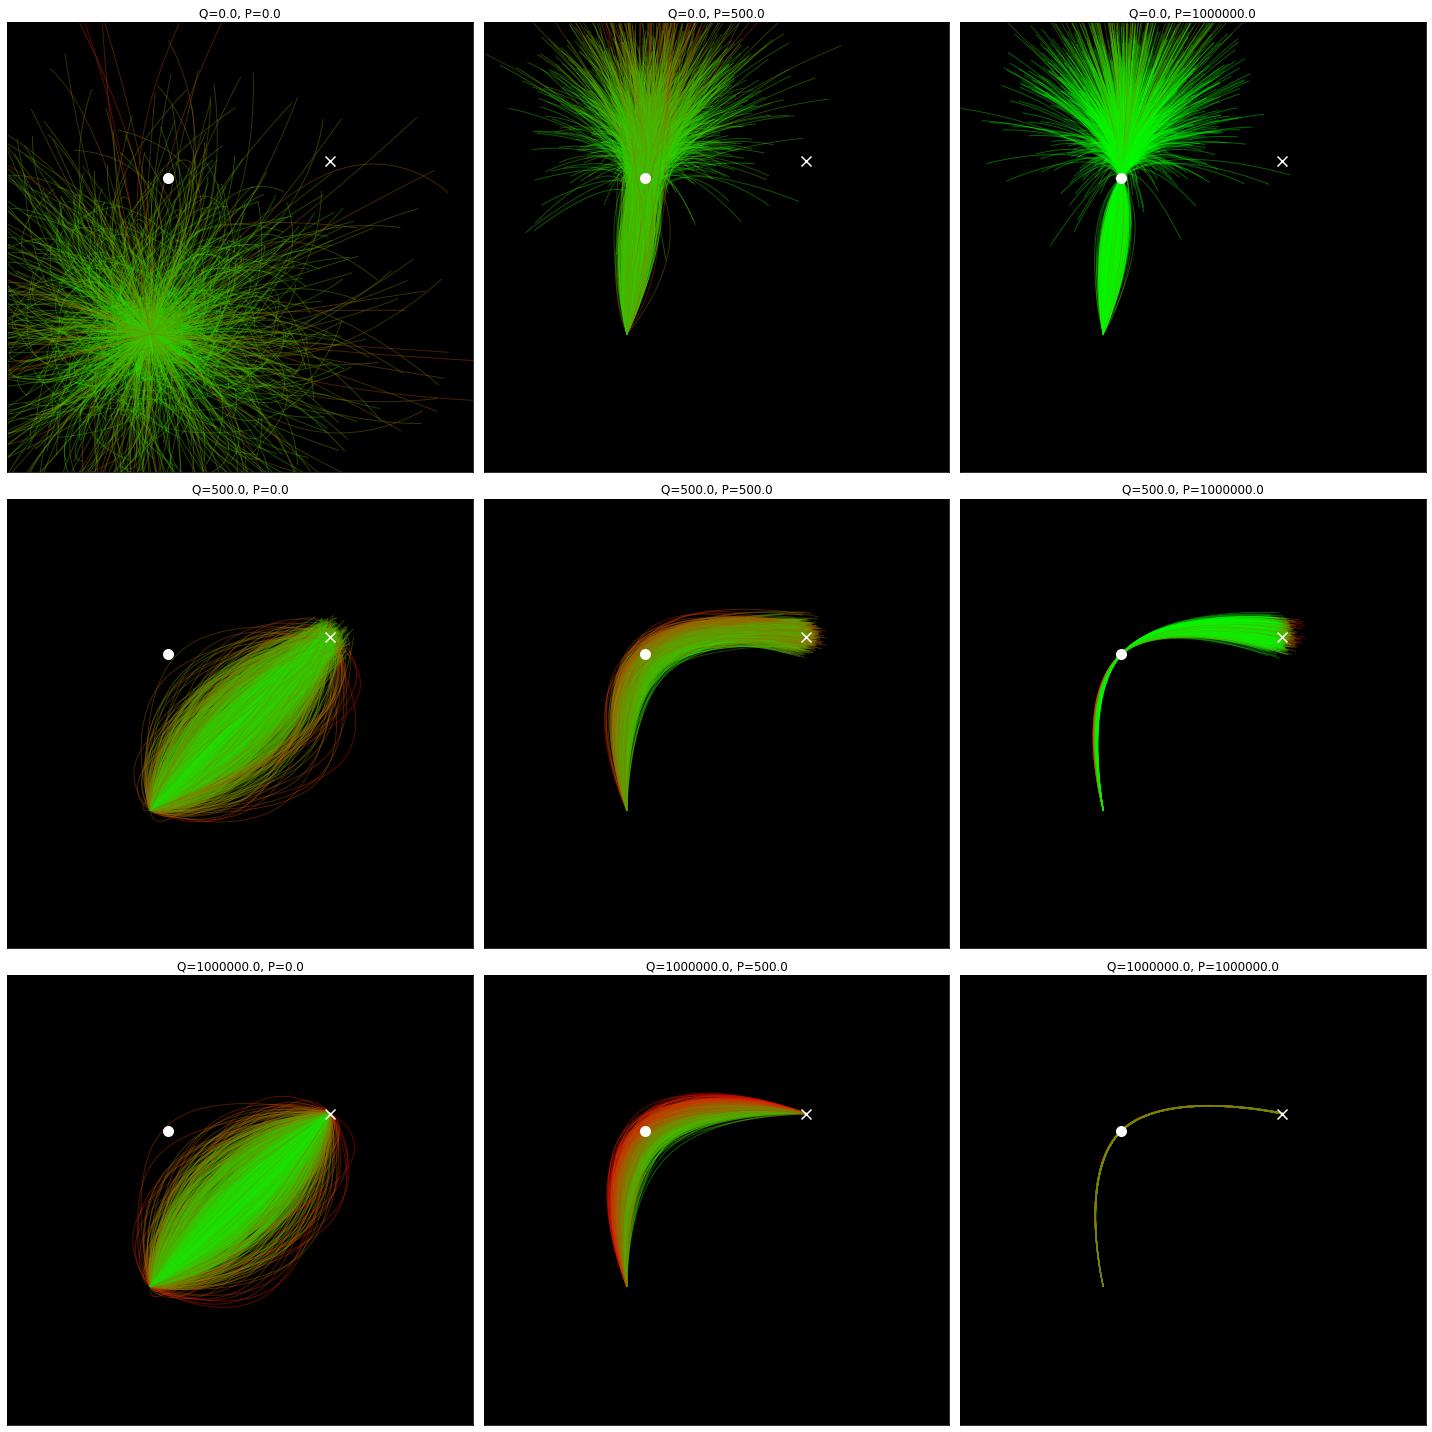

In [5]:
# Create a subplot with 3 rows and 3 columns
num_rows = 3
fig, axs = plt.subplots(num_rows, num_rows, figsize=(20,20))

# set black background
for ax in axs.flat:
    ax.set_facecolor('k')

for i in range(num_rows):
    for j in range(num_rows):
        idx = i*num_rows + j
        q = Q_list[idx]
        T = T_list[idx]
        rewards = 1 - (T - np.min(T)) / (np.max(T) - np.min(T))
        for n in range(N_traj):
            c = (1-rewards[n], rewards[n], 0)
            axs[i,j].plot(q[n,:,0], q[n,:,1], color=c, lw=1, alpha=.4)
        axs[i,j].scatter(qf[0], qf[1], color='w', marker='x', s=100, zorder=10)
        axs[i,j].scatter(via_prior[0], via_prior[1], color='w', marker='o', s=100, zorder=10)
        axs[i,j].set_title(f"Q={Qs[i]}, P={Ps[j]}")
        axs[i,j].set_xlim([-.8,1.8])
        axs[i,j].set_ylim([-.8,1.8])
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

plt.tight_layout()

### Sample trajectorries for each Q and P_prior for N_via = 20 (number of via points)

In [6]:
N_via = 20
vptraj = VPTraj(ndof=2, N_eval=100, N_via=N_via, vel_lim=1, acc_lim=10)

In [7]:
Q_list = []
T_list = []

p_prior = np.zeros(2*N_via)
idx_mid = N_via//2-1
p_prior[idx_mid*2:(idx_mid+1)*2] = via_prior
for Q in Qs:
    for P in Ps:
        P_prior = np.zeros((2*N_via, 2*N_via))
        P_prior[idx_mid*2:(idx_mid+1)*2, idx_mid*2:(idx_mid+1)*2] = P * np.eye(2)
        q, _, _, _, T = vptraj.sample_trajectories(N_traj, q0, dq0=dq0, qT=qf, dqT=dqf, Q=Q, R=R, mu_prior=p_prior, P_prior=P_prior)
        Q_list.append(q)
        T_list.append(T)

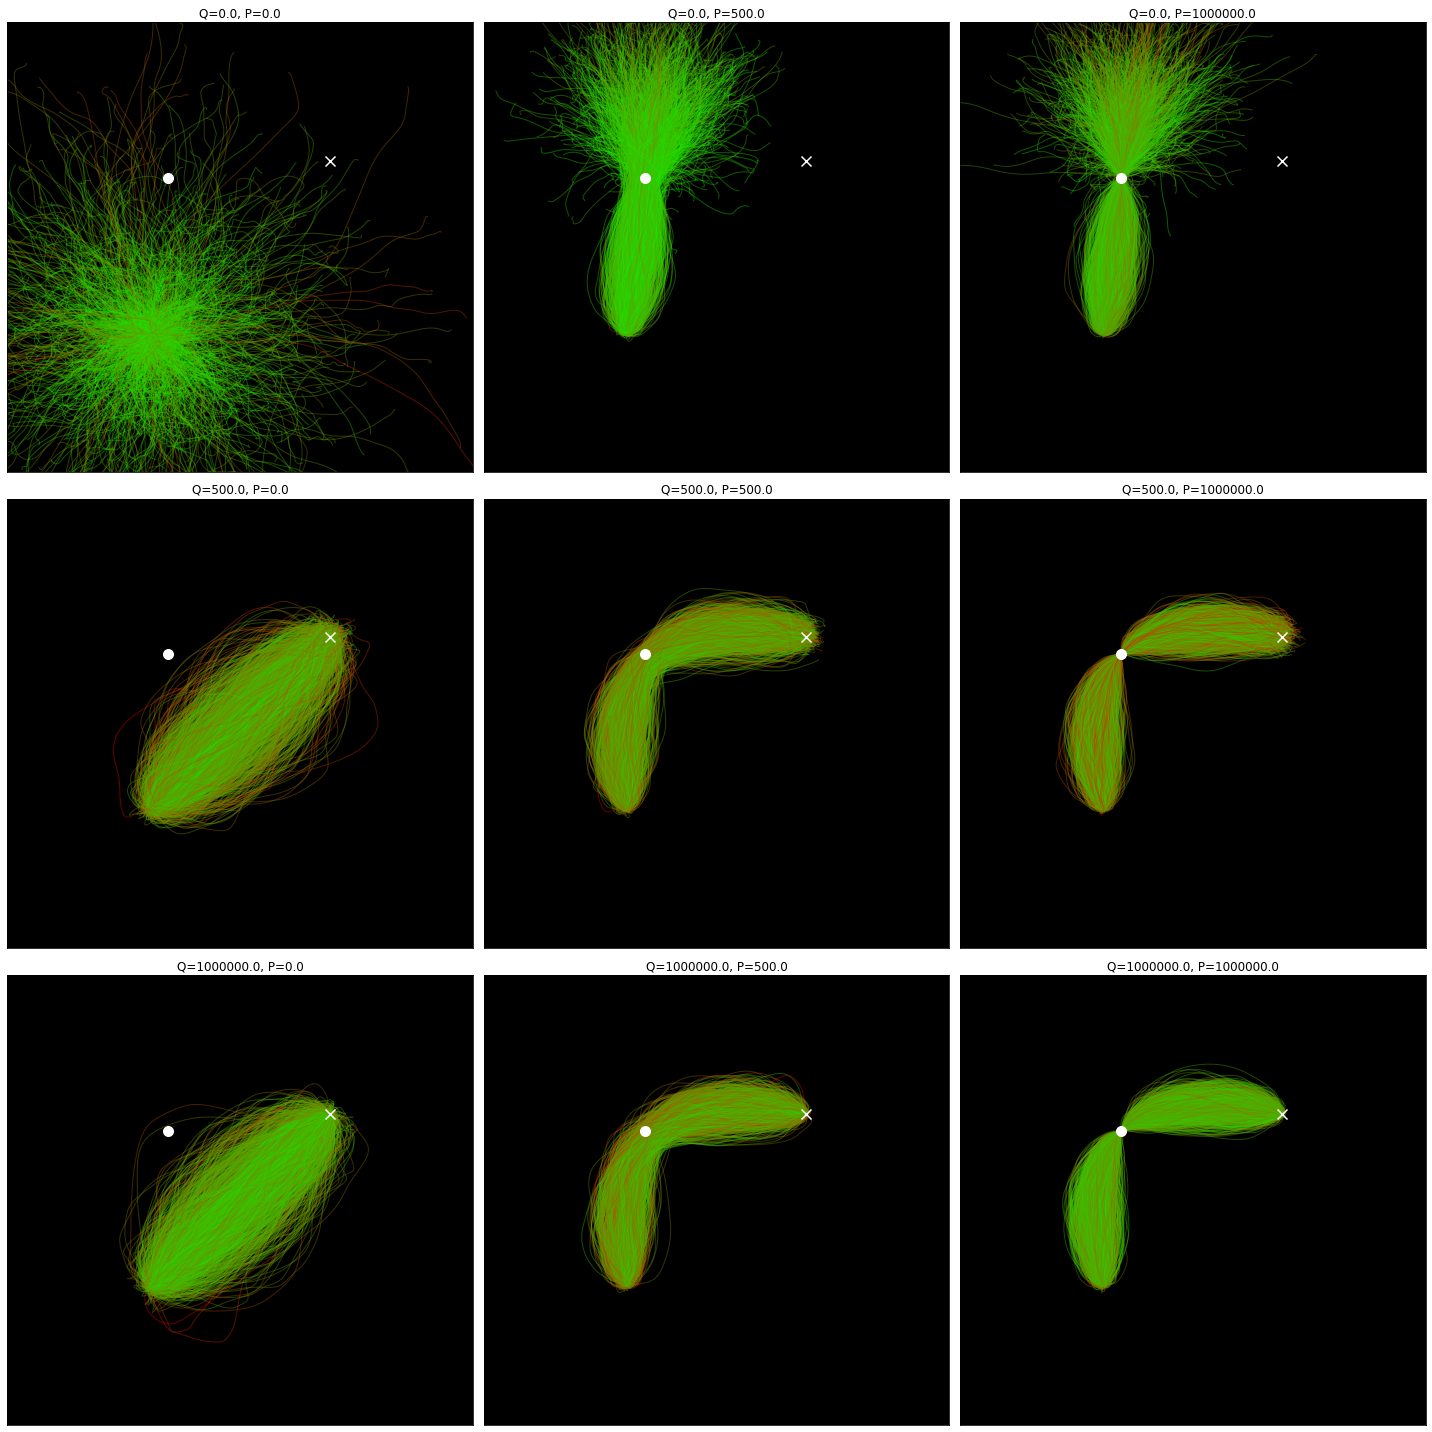

In [8]:
# Create a subplot with 3 rows and 3 columns
num_rows = 3
fig, axs = plt.subplots(num_rows, num_rows, figsize=(20,20))

# set black background
for ax in axs.flat:
    ax.set_facecolor('k')

for i in range(num_rows):
    for j in range(num_rows):
        idx = i*num_rows + j
        q = Q_list[idx]
        T = T_list[idx]
        rewards = 1 - (T - np.min(T)) / (np.max(T) - np.min(T))
        for n in range(N_traj):
            c = (1-rewards[n], rewards[n], 0)
            axs[i,j].plot(q[n,:,0], q[n,:,1], color=c, lw=1, alpha=.4)
        axs[i,j].scatter(qf[0], qf[1], color='w', marker='x', s=100, zorder=10)
        axs[i,j].scatter(via_prior[0], via_prior[1], color='w', marker='o', s=100, zorder=10)
        axs[i,j].set_title(f"Q={Qs[i]}, P={Ps[j]}")
        axs[i,j].set_xlim([-.8,1.8])
        axs[i,j].set_ylim([-.8,1.8])
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        
plt.tight_layout()